In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

import numpy as np

In [2]:
data = pd.read_csv ('100_ORIGA_extracted_features.csv', header=None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1,1.242705,-0.091538,-0.135974,0.457417,-0.117971,-0.412536,-0.017352,0.410867,0.122251,...,-0.097366,-0.090844,-0.083729,0.130346,0.044269,0.284233,0.052362,0.058594,0.102549,-0.155801
1,1,0.839991,-0.109244,0.401936,-0.323721,0.425317,-0.108331,0.213517,0.381199,0.257422,...,0.066288,-0.230978,0.101066,0.054869,-0.015602,0.014577,-0.063988,0.336676,-0.004043,-0.016019
2,1,1.528962,0.273832,-0.011421,0.409195,-0.122576,-0.377838,-0.158372,0.679533,-0.077736,...,0.029074,0.108244,-0.168049,-0.239052,-0.014683,0.104267,-0.091905,0.259320,-0.145102,-0.223513
3,1,-1.111430,-1.082960,1.073659,0.587695,0.557967,-0.450178,0.129192,0.005208,-0.307739,...,0.026741,-0.155440,-0.122612,0.070310,0.043376,0.156477,-0.045310,0.183063,-0.082990,0.101517
4,1,-1.173807,-0.404780,-0.082226,0.057755,0.452729,-0.243480,0.184078,0.005473,-0.777610,...,-0.015162,-0.207403,-0.129538,-0.011754,0.160609,-0.061188,-0.068871,0.096651,-0.031745,-0.076604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0,-0.171099,-1.587706,1.038423,-0.389054,0.167730,0.109614,-0.138337,0.314171,-0.041942,...,0.074587,-0.041009,0.281921,-0.134236,-0.028189,0.022650,-0.172313,-0.097931,-0.143045,-0.006172
1296,0,1.833023,0.126240,-0.238809,-0.556300,0.077003,0.234347,0.031044,-0.538952,-0.221392,...,0.015276,-0.051766,0.355284,0.078264,0.016314,-0.009033,-0.055552,-0.052481,0.023818,-0.040900
1297,0,-0.795103,-1.369658,0.908197,-0.148467,-0.430915,-0.159123,0.406194,-0.070435,-0.035581,...,0.052967,-0.087494,0.019638,-0.287762,0.058684,0.077223,0.292877,-0.128110,0.019321,-0.009103
1298,0,-0.666555,1.053101,-0.377860,0.110721,0.518406,0.164488,-0.737410,0.254875,-0.341231,...,0.243863,-0.092874,-0.063361,0.005332,-0.089892,0.027662,0.142340,0.134459,-0.032164,0.218881


In [4]:
df = np.array(data.iloc[:,range(1,data.shape[1])])
y = data.iloc[:,0]

In [5]:
print ( "classes are : " , np.unique ( y ) )  

classes are :  [0 1]


In [10]:
print('Glaucoma class numbers:',len(y[y==1])) # patients having Glaucoma
print('Non Glaucoma class numbers:',len(y[y==0])) #patients having non glaucoma

Glaucoma class numbers: 336
Non Glaucoma class numbers: 964


In [6]:
# from mlxtend.classifier import EnsembleVoteClassifier
# import csv

# clf1 = MLPClassifier(max_iter=300)
# clf2 = svm.SVC()
# clf3 =  RandomForestClassifier( n_estimators=100 , random_state = 7 )

# eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

# labels = ['MLP', 'SVM' ,'Random Forest', 'Majority-Voting-Ensemble']
# for clf, label in zip([clf1, clf2, clf3, eclf], labels):
    
    
#     scores = model_selection.cross_validate(clf, X, Y, 
#                                               cv=7, 
#                                               scoring=['accuracy', 'f1'])

# #     scores = model_selection.cross_val_score(clf, X, Y, 
# #                                               cv=5, 
# #                                               scoring=['accuracy', 'f1'])
#     print("Average Accuracy: %0.2f (+/- %0.2f) [%s]" 
#           % (scores['test_accuracy'].mean(), scores['test_accuracy'].std(), label))
#     print("Average F1-score: %0.2f (+/- %0.2f) [%s]" 
#           % (scores['test_f1'].mean(), scores['test_f1'].std(), label))
    
#     my_dict = scores
#     filename = str(clf) + '_fundus_test_results_7_fold.csv'
#     with open(filename, 'w') as f:
#         for key in my_dict.keys():
#             f.write("%s,%s\n"%(key,my_dict[key]))

In [7]:
####################################################################################
# #------------------------------BASE MODEL LEARNING (K-FOLD)------------------------#
# ####################################################################################

# from sklearn.metrics import precision_recall_fscore_support as score
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import confusion_matrix
# from mlxtend.classifier import EnsembleVoteClassifier
# import csv
# from sklearn.metrics import accuracy_score


# clf1 = MLPClassifier(max_iter=300)
# clf2 = svm.SVC()
# clf3 =  RandomForestClassifier( n_estimators=100 , random_state = 7 )

# eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

# clfs=[clf1,clf2,clf3,eclf]

# labels = ['MLP', 'SVM' ,'Random Forest', 'Majority-Voting-Ensemble']

# # fix random seed for reproducibility
# seed = 100000
# np.random.seed(seed)

# folds=7 #How Many Folds

# cv_train_set=[]
# cv_test_set=[]
# kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)

# for train_index,test_index in kfold.split(df,y):
#     cv_train_set.append(train_index)
#     cv_test_set.append(test_index)
    
    
# base_models_cvscores = [] #Storing Matrix

# for clf, label in zip(clfs, labels):
#     print('============================================================================================')
#     print(label)
#     for indx in range(0,folds):
#         # Fit the model
#         history=clf.fit(df[cv_train_set[indx]], y[cv_train_set[indx]])
        
#         # evaluate the model
#         y_prdt=clf.predict(df[cv_test_set[indx]])
#         y_test=y[cv_test_set[indx]]
#         precision, recall, fscore, support = score(y_test, y_prdt)
#         acc=accuracy_score(y_test, y_prdt)
#         cm = confusion_matrix(y_test, y_prdt)
#         print('----------------------------------------------------------')
#         print('Fold:',indx)
#         print("Test Result for: , [%s]" 
#               %(label))
#         print('precision: {0:.4f}'.format(np.mean(precision)*100))
#         print('recall: {0:.4f}'.format(np.mean(recall)*100))
#         print('fscore: {0:.4f}'.format(np.mean(fscore)*100))
#         print('Accuracy: {0:.4f}'.format(acc*100))
#         print('Confusion Matrix:')
#         print(cm)
#         print('----------------------------------------------------------')
#         base_models_cvscores.append(['Fold'+str(indx),label,np.mean(precision)*100,
#                                      np.mean(recall)*100, np.mean(fscore)*100,acc*100])
# print('=======================================XXX===================================================')

MLP
----------------------------------------------------------
Fold: 0
Test Result for: , [MLP]
precision: 93.4740
recall: 93.5484
fscore: 93.4542
Accuracy: 93.5484
Confusion Matrix:
0.9710144927536232
0.16666666666666666
0.9436619718309859
0.9090909090909091
5.82608695652174
0.034782608695652195
[[134   4]
 [  8  40]]
0.9021739130434784
----------------------------------------------------------
----------------------------------------------------------
Fold: 1
Test Result for: , [MLP]
precision: 95.6920
recall: 95.6989
fscore: 95.6361
Accuracy: 95.6989
Confusion Matrix:
0.9855072463768116
0.125
0.9577464788732394
0.9545454545454546
7.884057971014493
0.016563146997929552
[[136   2]
 [  6  42]]
0.9302536231884058
----------------------------------------------------------
----------------------------------------------------------
Fold: 2
Test Result for: , [MLP]
precision: 98.9401
recall: 98.9247
fscore: 98.9172
Accuracy: 98.9247
Confusion Matrix:
1.0
0.041666666666666664
0.9857142857142

/home/achirangshu/anaconda3/envs/glaucoma_screen/lib/python3.6/site-packages/mlxtend/plotting/plot_confusion_matrix.py:97: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


----------------------------------------------------------
Fold: 0
Test Result for: , [Majority-Voting-Ensemble]
precision: 93.6279
recall: 93.5484
fscore: 93.3460
Accuracy: 93.5484
Confusion Matrix:
0.9855072463768116
0.20833333333333334
0.9315068493150684
0.95
4.730434782608695
0.01830663615560635
[[136   2]
 [ 10  38]]
0.888586956521739
----------------------------------------------------------
----------------------------------------------------------
Fold: 1
Test Result for: , [Majority-Voting-Ensemble]
precision: 95.9346
recall: 95.6989
fscore: 95.5640
Accuracy: 95.6989
Confusion Matrix:
1.0
0.16666666666666666
0.9452054794520548
1.0
6.000000000000002
0.0
[[138   0]
 [  8  40]]
0.9166666666666667
----------------------------------------------------------
----------------------------------------------------------
Fold: 2
Test Result for: , [Majority-Voting-Ensemble]
precision: 98.9401
recall: 98.9247
fscore: 98.9172
Accuracy: 98.9247
Confusion Matrix:
1.0
0.041666666666666664
0.98

TypeError: Index(...) must be called with a collection of some kind, False was passed

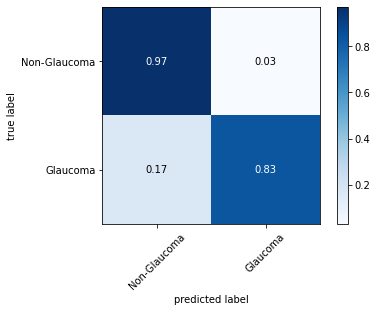

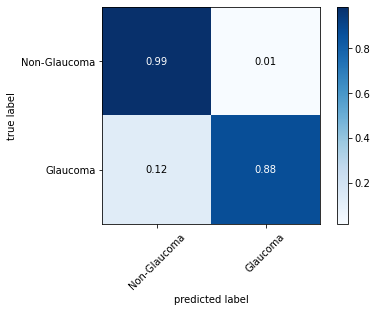

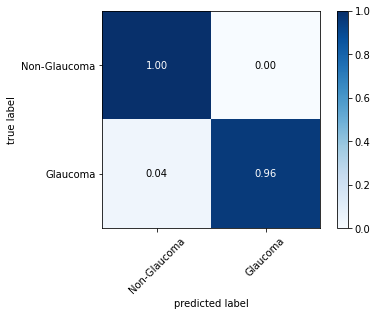

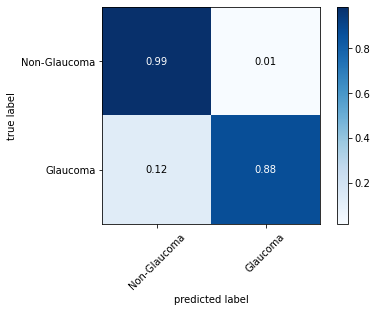

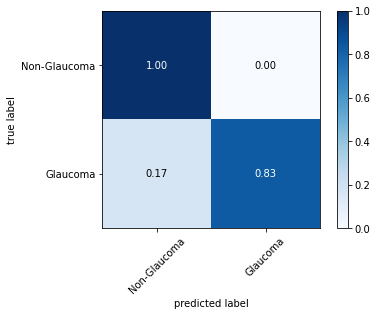

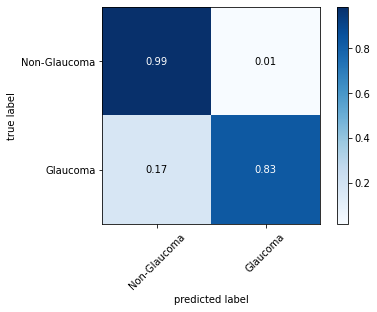

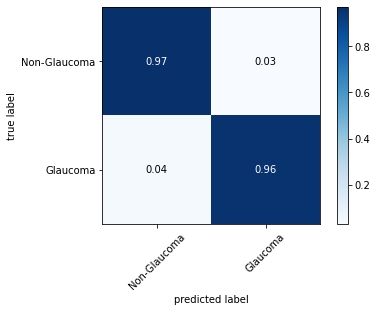

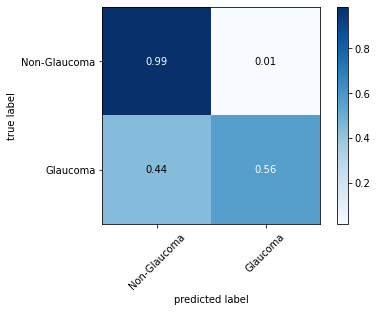

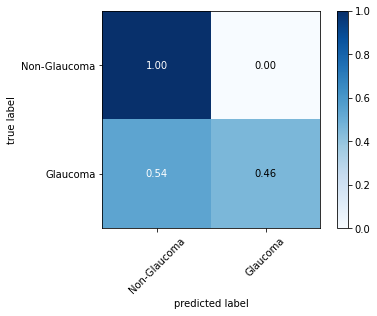

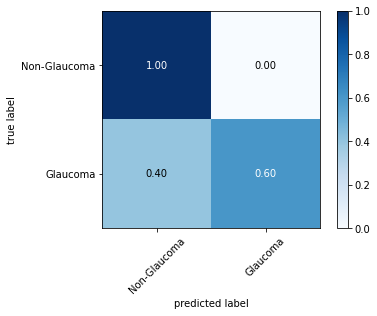

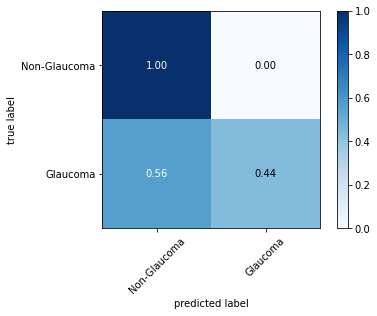

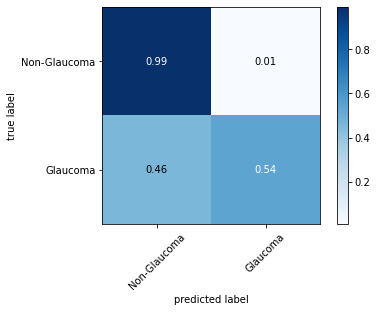

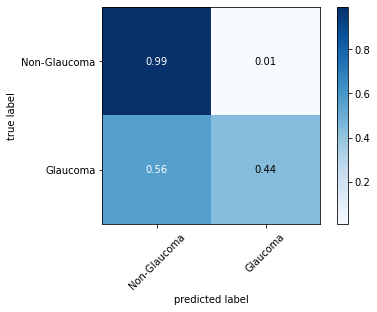

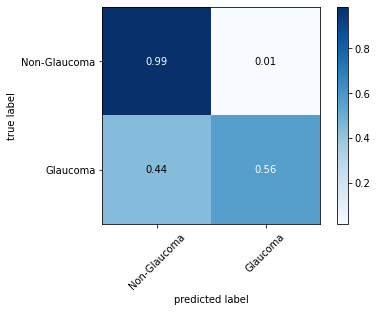

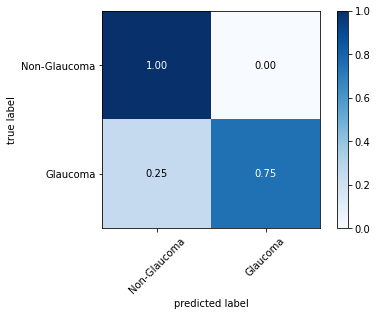

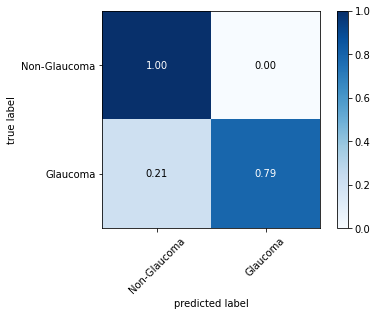

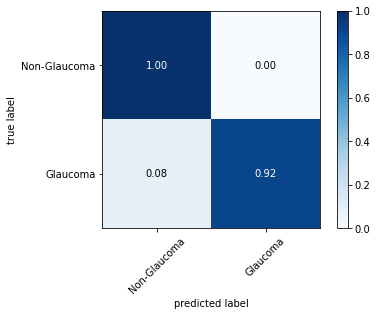

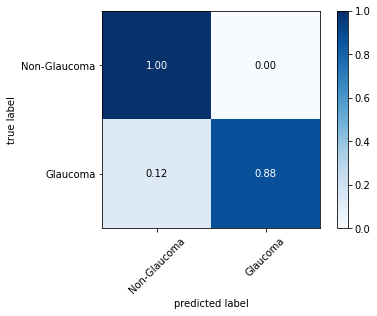

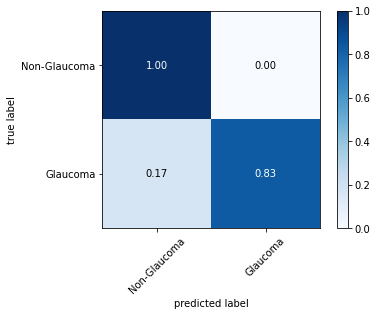

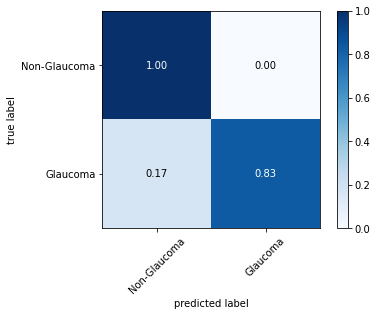

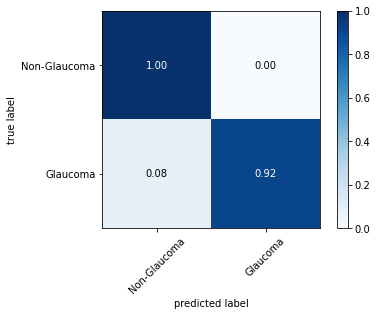

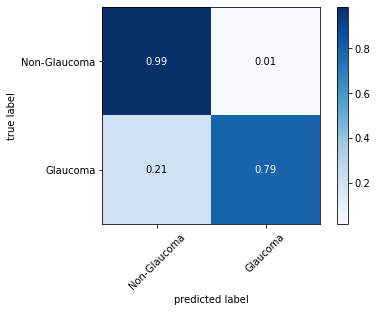

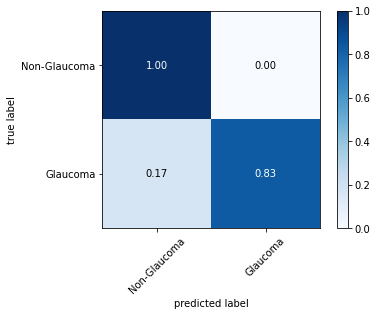

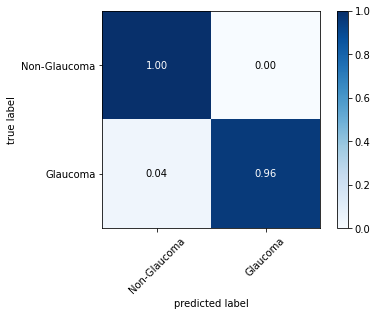

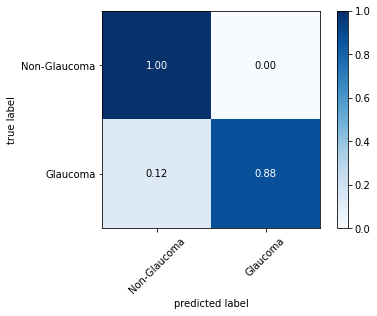

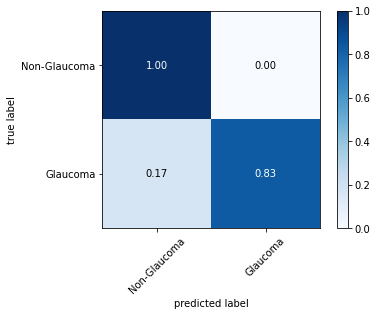

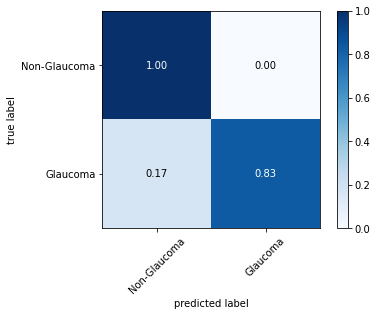

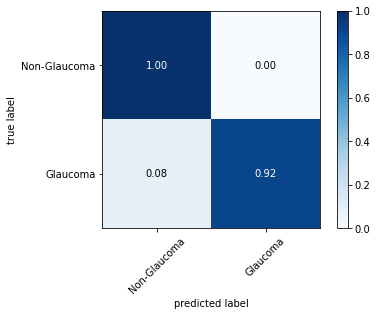

In [20]:
####################################################################################
#------------------------------BASE MODEL LEARNING (K-FOLD)------------------------#
####################################################################################

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from mlxtend.classifier import EnsembleVoteClassifier
import csv
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
# from matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score




clf1 = MLPClassifier(max_iter=300)
clf2 = svm.SVC()
clf3 =  RandomForestClassifier( n_estimators=100 , random_state = 7 )

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

clfs=[clf1,clf2,clf3,eclf]

labels = ['MLP', 'SVM' ,'Random Forest', 'Majority-Voting-Ensemble']

# fix random seed for reproducibility
seed = 100000
np.random.seed(seed)

folds=7 #How Many Folds

cv_train_set=[]
cv_test_set=[]
kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)

for train_index,test_index in kfold.split(df,y):
    cv_train_set.append(train_index)
    cv_test_set.append(test_index)
    
    
base_models_cvscores = [] #Storing Matrix
for clf, label in zip(clfs, labels):
    print('============================================================================================')
    print(label)
    for indx in range(0,folds):
        # Fit the model
        history=clf.fit(df[cv_train_set[indx]], y[cv_train_set[indx]])
        
        # evaluate the model
        y_prdt=clf.predict(df[cv_test_set[indx]])
        y_test=y[cv_test_set[indx]]
        precision, recall, fscore, support = score(y_test, y_prdt, average='weighted', 
                                                   labels=np.unique(y_prdt))
        acc=accuracy_score(y_test, y_prdt)
        cm = confusion_matrix(y_test, y_prdt)
        TP = cm[0][0]
        FN = cm[0][1]
        FP = cm[1][0]
        TN = cm[1][1]
        TPR = TP/(TP+FN)
        FPR = FP/(FP+TN)
        PPV = TP/(TP+FP)
        NPV = TN/(TN+FN)
        TNR = TN/(TN+FP)
        TPR = TP/(TP+FN)
        LRPOS = TPR/ (1-TNR)
        LRNEG = (1-TPR)/TNR
        roc_score = roc_auc_score(y_test, y_prdt)
        print('----------------------------------------------------------')
        print('Fold:',indx)
        print("Test Result for: , [%s]" 
              %(label))
        print('precision: {0:.4f}'.format(np.mean(precision)*100))
        print('recall: {0:.4f}'.format(np.mean(recall)*100))
        print('fscore: {0:.4f}'.format(np.mean(fscore)*100))
        print('Accuracy: {0:.4f}'.format(acc*100))
        print('Confusion Matrix:')
        print(TPR)
        print(FPR)
        print(PPV)
        print(NPV)
        print(LRPOS)
        print(LRNEG)
        print(cm)
        print(roc_score)
        
        

        class_names = ['Non-Glaucoma','Glaucoma']

        fig, ax = plot_confusion_matrix(conf_mat=cm,
                                        colorbar=True,
                                        show_absolute=False,
                                        show_normed=True,
                                        class_names=class_names)

        plt.savefig('final_plots/Fold_'+str(indx)+'_'+label+'.png', bbox_inches = 'tight')


        ## Display the visualization of the Confusion Matrix.
#         plt.show()
        print('----------------------------------------------------------')
        base_models_cvscores.append([str(indx),label,np.mean(precision)*100,
                                     np.mean(recall)*100, np.mean(fscore)*100,acc*100,TPR,FPR,LRPOS,LRNEG,roc_score])
print('=======================================XXX===================================================')
result_lables = ['Fold', 'Model', 'Precision', 'Recall','F1', 'Acc', 'TPR', 'FPR', 'LRPOS', 'LRNEG', 'ROC']

base_models_cvscores = pd.DataFrame(base_models_cvscores, index= False)
base_models_cvscores.to_csv('final_result/Final_result_2022.csv', header = result_lables)

    Unnamed: 0  Fold                     Model  Precision     Recall  \
0            0     0                       MLP  93.474041  93.548387   
1            1     1                       MLP  95.692041  95.698925   
2            2     2                       MLP  98.940092  98.924731   
3            3     3                       MLP  95.692041  95.698925   
4            4     4                       MLP  95.934600  95.698925   
5            5     5                       MLP  94.621595  94.594595   
6            6     6                       MLP  96.827227  96.756757   
7            7     0                       SVM  88.296267  87.634409   
8            8     1                       SVM  88.237608  86.021505   
9            9     2                       SVM  91.021163  89.784946   
10          10     3                       SVM  87.859238  85.483871   
11          11     4                       SVM  88.778432  87.634409   
12          12     5                       SVM  86.554016  84.86

In [27]:
#================================================
#Final Result analysis
#================================================
result_final = pd.read_csv('final_result/Final_result_2022.csv')
result_final

labels = ['MLP', 'SVM' ,'Random Forest', 'Majority-Voting-Ensemble']

final_result_avg_for_paper= list()
final_result_std_for_paper= list()

for i  in labels:
    indx = np.where(result_final['Model'] == i)
    val_avg = np.mean(result_final.iloc[indx[0],range(3,12)], axis= 0)
    val_std = np.std(result_final.iloc[indx[0],range(3,12)], axis= 0)
    final_result_avg_for_paper.append([i, val_avg[0],val_avg[1],val_avg[2],val_avg[3], val_avg[4], val_avg[5],val_avg[6],val_avg[7], val_avg[8]])
    final_result_std_for_paper.append([i, val_std[0],val_std[1],val_std[2],val_std[3], val_std[4], val_std[5],val_std[6],val_std[7], val_std[8]])
    

final_result_avg_for_paper  = pd.DataFrame(final_result_avg_for_paper)
final_result_std_for_paper  = pd.DataFrame(final_result_std_for_paper)

In [35]:
final_result_avg_for_paper.to_csv('final_result/Final_result_avg_paper_2022.csv',header= ['Model','Precision','Recall','F1','Acc','TPR','FPR','LRPOS','LRNEG','ROC'])
final_result_std_for_paper .to_csv('final_result/Final_result_std_paper_2022.csv',header= ['Model','Precision','Recall','F1','Acc','TPR','FPR','LRPOS','LRNEG','ROC'])

In [36]:
final_result_avg_for_paper

,0,1,2,3,4,5,6,7,8,9
0,MLP,95.883091,95.845892,95.779703,95.845892,0.985462,0.119048,11.543697,0.016556,0.933207
1,SVM,88.426933,86.998796,85.452206,86.998796,0.993766,0.485119,2.083713,0.011683,0.754324
2,Random Forest,96.231160,96.001162,95.865276,96.001162,1.000000,0.154762,7.542857,0.000000,0.922619
3,Majority-Voting-Ensemble,96.451322,96.308382,96.205569,96.308382,0.997930,0.136905,9.532919,0.002615,0.930512
